In [1]:
import pickle
from creme import metrics
from helper import transform_text
import pandas as pd

In [2]:
# Load the model from the file
with open('predict-doc3.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [3]:
import os
import numpy as np

# Define the path to the train folder
train_folder_path = './db/Test Data/'

# Get a list of all filenames in the train folder
filenames = os.listdir(train_folder_path)

# Filter out only the files (excluding directories)
filenames = [filename for filename in filenames if os.path.isfile(
    os.path.join(train_folder_path, filename))]

# Convert the list of filenames to a NumPy array
filenames_array = np.array(filenames)

# Display the filenames array
print(filenames_array)

['Business Documents.pdf' 'Creative Writing.pdf'
 'Educational Materials.pdf' 'Financial Statements.pdf'
 'Government Documents.pdf' 'Legal Documents.pdf' 'Medical Records.pdf'
 'News Articles.pdf' 'Scientific Research Paper.pdf'
 'Technical Manuals.pdf']


In [4]:
import PyPDF2

ModuleNotFoundError: No module named 'PyPDF2'

In [5]:

texts = []
labels = []
# Loop through each PDF file
for pdf_file in filenames_array:
    # Open the PDF file
    with open(os.path.join('./db/Test Data/', pdf_file), 'rb') as f:
        # Initialize PyPDF2 PdfFileReader object
        pdf_reader = PyPDF2.PdfReader(f)
        no_of_pages = len(pdf_reader.pages)
        # Extract text from each page
        text = ''
        for num in range(no_of_pages):
            page = pdf_reader.pages[num]
            text += page.extract_text()

        # Append extracted text and label to the respective lists
        texts.append(text)
        # Get the label (file name without extension)
        labels.append(os.path.splitext(pdf_file)[0])

# Create a DataFrame
df = pd.DataFrame({'content': texts, 'category': labels})

# Display the DataFrame
print(df)

NameError: name 'PyPDF2' is not defined

In [33]:
messages_test = df.to_records(index=False)
messages_test

rec.array([('To whom it may concern:\nElon Musk’s takeover of Twitter will further toxify our information ecosystem \nand be a direct threat to public safety, especially among those already most \nvulnerable and marginalized.  \nTwitter has outsized influence in shaping both public discourse and industry-\nwide platform governance standards. While the company is hardly a poster-\nchild for healthy social media, it  has taken welcome steps in recent years to \nmitigate systemic risks, ratcheting up pressure on the likes of Facebook and \nYouTube to follow suit. Musk intends to steamroll those safeguards and provide \na megaphone to extremists who traffic in disinformation, hate, and harassment. \nUnder the guise of ‘free speech,’ his vision will silence and endanger marginalized \ncommunities, and tear at the fraying fabric of democracy.\nThe undersigned organizations believe that Twitter should continue to uphold the \npractices that serve as guideposts for other Big Tech platforms. We

In [35]:
# test Data Accuracy
from sklearn.metrics import confusion_matrix


true_labels = []
predicted_labels = []
for content, category in messages_test:
    y_pred = loaded_model.predict_one(content)
    test_metric = test_metric.update(category, y_pred)
    true_labels.append(category)
    predicted_labels.append(y_pred)
    print( "actual:", category, "| prediction: ", y_pred )
    
cm = confusion_matrix(true_labels, predicted_labels)
print(test_metric)


actual: Business Documents | prediction:  Government Documents
actual: Creative Writing | prediction:  Government Documents
actual: Educational Materials | prediction:  Educational Materials
actual: Financial Statements | prediction:  Government Documents
actual: Government Documents | prediction:  Government Documents
actual: Legal Documents | prediction:  Government Documents
actual: Medical Records | prediction:  Government Documents
actual: News Articles | prediction:  Government Documents
actual: Scientific Research Paper | prediction:  Scientific Research Paper
actual: Technical Manuals | prediction:  Government Documents
Accuracy: 31.82%


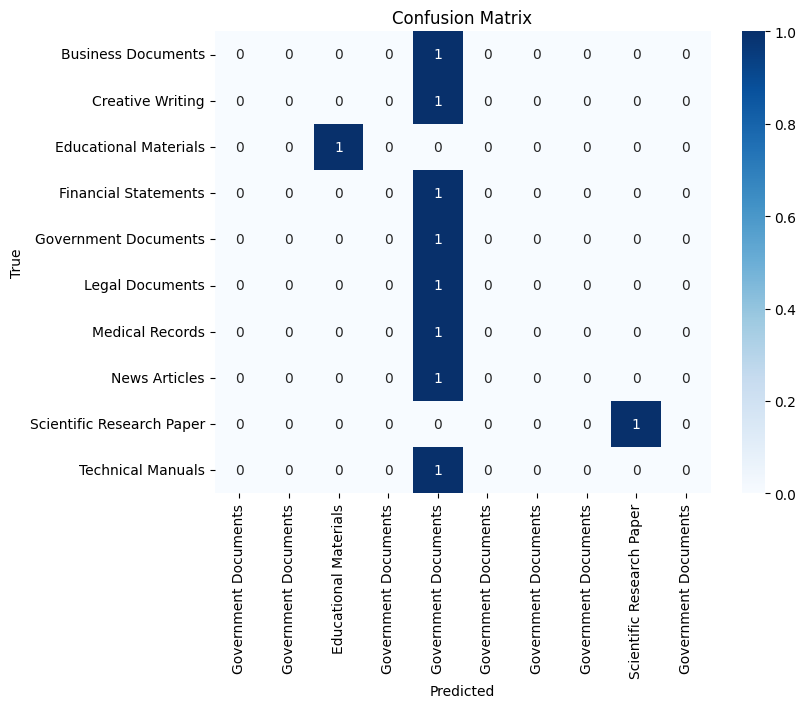

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=predicted_labels, yticklabels=true_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()